# 0.0 Imports

In [1]:
from sklearn import datasets as ds
from sklearn import model_selection as ms
from sklearn import linear_model as lm
from sklearn import metrics as mt

from matplotlib import pyplot as plt
import numpy as np

# 1.0 Load Dataset

In [2]:
# Generate 2 classes dataset
X, y = ds.make_classification(n_samples=1000, n_classes=2, random_state=1)

In [3]:
X.shape

(1000, 20)

In [4]:
X

array([[-2.04582165, -0.13791624, -0.08071423, ...,  2.48194524,
         0.74236675,  0.23154789],
       [-0.98726024,  1.30120189,  2.37734888, ...,  0.55445754,
        -0.21892143, -0.37608578],
       [ 0.57335921,  0.09375582,  0.4662521 , ..., -0.6088508 ,
         0.79903499, -0.17121177],
       ...,
       [-0.70737159,  1.07650943,  0.58510456, ..., -1.51337602,
         0.90239871, -0.69230951],
       [-0.20706849,  1.17319848, -1.94478665, ..., -0.32820676,
         1.5711921 ,  1.14877729],
       [-2.16769231, -2.54871672,  2.89359255, ...,  0.71535366,
         0.34329241,  1.07350284]])

In [5]:
y[:10]

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1])

# 2.0 Model Training

In [6]:
# split training and test dataset
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2)

In [7]:
# define
model = lm.LogisticRegression(solver='lbfgs')

# train
model.fit(X_train, y_train)

# performance
yhat_test = model.predict_proba(X_test)

In [8]:
yhat_test[:10]

array([[0.93239998, 0.06760002],
       [0.87624172, 0.12375828],
       [0.11363506, 0.88636494],
       [0.875486  , 0.124514  ],
       [0.30739012, 0.69260988],
       [0.95936125, 0.04063875],
       [0.10805201, 0.89194799],
       [0.88464872, 0.11535128],
       [0.89708454, 0.10291546],
       [0.11138358, 0.88861642]])

In [9]:
# vamos selecionar as probabilidades da classe 1
yhat_test = yhat_test[:, 1]

In [10]:
yhat_test[:10]

array([0.06760002, 0.12375828, 0.88636494, 0.124514  , 0.69260988,
       0.04063875, 0.89194799, 0.11535128, 0.10291546, 0.88861642])

In [11]:
y_test[:10]

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [12]:
fpr, tpr, thresholds = mt.roc_curve(y_test, yhat_test)

In [13]:
fpr

array([0.        , 0.        , 0.        , 0.00990099, 0.00990099,
       0.01980198, 0.01980198, 0.02970297, 0.02970297, 0.03960396,
       0.03960396, 0.04950495, 0.04950495, 0.05940594, 0.05940594,
       0.06930693, 0.06930693, 0.07920792, 0.07920792, 0.08910891,
       0.08910891, 0.0990099 , 0.0990099 , 0.11881188, 0.11881188,
       0.12871287, 0.12871287, 0.13861386, 0.13861386, 0.14851485,
       0.14851485, 0.20792079, 0.20792079, 0.22772277, 0.22772277,
       0.30693069, 0.30693069, 0.31683168, 0.31683168, 0.32673267,
       0.32673267, 0.41584158, 0.41584158, 1.        ])

In [14]:
tpr

array([0.        , 0.01010101, 0.15151515, 0.15151515, 0.55555556,
       0.55555556, 0.5959596 , 0.5959596 , 0.65656566, 0.65656566,
       0.68686869, 0.68686869, 0.6969697 , 0.6969697 , 0.72727273,
       0.72727273, 0.74747475, 0.74747475, 0.78787879, 0.78787879,
       0.7979798 , 0.7979798 , 0.81818182, 0.81818182, 0.86868687,
       0.86868687, 0.90909091, 0.90909091, 0.91919192, 0.91919192,
       0.92929293, 0.92929293, 0.93939394, 0.93939394, 0.95959596,
       0.95959596, 0.96969697, 0.96969697, 0.97979798, 0.97979798,
       0.98989899, 0.98989899, 1.        , 1.        ])

In [15]:
thresholds

array([1.99964359e+00, 9.99643593e-01, 9.78008207e-01, 9.77518471e-01,
       8.64173254e-01, 8.59063155e-01, 8.51366398e-01, 8.48080767e-01,
       8.31370915e-01, 8.29442319e-01, 8.17216106e-01, 8.12995861e-01,
       8.06651010e-01, 8.00648056e-01, 7.78714150e-01, 7.76692043e-01,
       7.56441834e-01, 7.54868031e-01, 7.32276047e-01, 7.27893947e-01,
       7.23407282e-01, 7.22170034e-01, 7.00523199e-01, 6.92609885e-01,
       6.43606493e-01, 6.35883546e-01, 5.97825061e-01, 5.90804966e-01,
       5.76815837e-01, 5.66428173e-01, 5.35704065e-01, 4.75300431e-01,
       4.71915601e-01, 4.52036830e-01, 3.76055561e-01, 2.95719723e-01,
       2.93447353e-01, 2.77725541e-01, 2.64327639e-01, 2.62095394e-01,
       2.61253882e-01, 1.52991172e-01, 1.49187828e-01, 4.05153735e-04])

In [16]:
yhat_test.shape

(200,)

In [37]:
len(np.unique(np.round(yhat_test, 2)))

78

In [28]:
thresholds.shape

(44,)

199

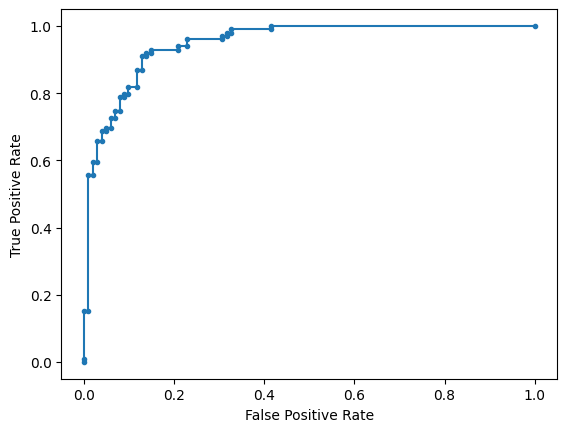

In [18]:
plt.plot(fpr, tpr, marker='.')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

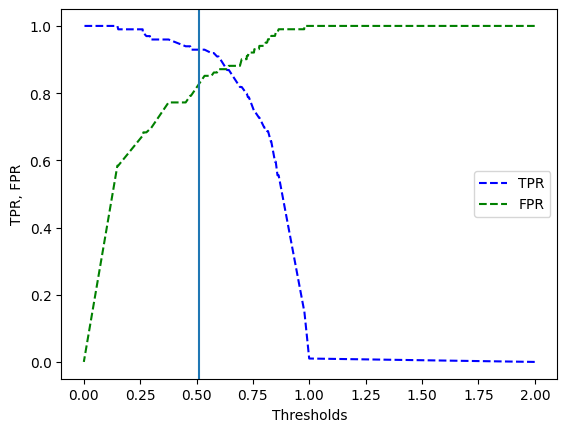

In [19]:
plt.plot(thresholds, tpr, 'b--', label='TPR')
plt.plot(thresholds, 1-fpr, 'g--', label='FPR')

plt.axvline(0.51)

plt.xlabel('Thresholds')
plt.ylabel('TPR, FPR')

plt.legend()
plt.show()

In [20]:
tr = 0.51

np.array([1 if yhat_test[i] > tr else 0 for i in range(yhat_test.shape[0])])

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1])